# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv(r"C:\Users\Léo\Downloads\ciencia de dados\CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [3]:
df_transformado = df.copy()

df_transformado['Income'] = (
    df_transformado['Income']
    .str.replace('.', '', regex=False)   
    .str.replace(',', '.', regex=False) 
)
df_transformado['Income'] = pd.to_numeric(df_transformado['Income'], errors='coerce')

if df_transformado['Credit Score'].str.replace('.', '', regex=False)\
                                  .str.replace(',', '.', regex=False)\
                                  .str.isnumeric().any():
    df_transformado['Credit Score'] = (
        df_transformado['Credit Score']
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
    )
    df_transformado['Credit Score'] = pd.to_numeric(df_transformado['Credit Score'], errors='coerce')

print(df_transformado.info())
print(df_transformado.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB
None
    Age  Gender    Income            Education Marital Status  \
0  25.0  Female   50000.0    Bachelor's Degree         Single   
1  30.0    Male  100000.0      Master's Degree        Married   
2  35.0  Female   75000.0            Doctorate        Married   
3  40.0    Male  125000.0  High School Diploma         Single   
4  45.0  Fema

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [4]:
faltantes = df_transformado.isnull().sum()
print("Valores faltantes antes do tratamento:\n", faltantes)


df_tratado = df_transformado.copy()
if df_tratado['Age'].isnull().sum() > 0:
    mediana_age = df_tratado['Age'].median()
    df_tratado['Age'].fillna(mediana_age, inplace=True)
    print(f"Valores ausentes em 'Age' substituídos pela mediana: {mediana_age}")

faltantes_pos = df_tratado.isnull().sum()
print("\nValores faltantes após o tratamento:\n", faltantes_pos)

Valores faltantes antes do tratamento:
 Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64
Valores ausentes em 'Age' substituídos pela mediana: 36.0

Valores faltantes após o tratamento:
 Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


C:\Users\Léo\AppData\Local\Temp\ipykernel_18684\4017465514.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tratado['Age'].fillna(mediana_age, inplace=True)


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [5]:
colunas_categoricas = df_tratado.select_dtypes(include='object').columns

valores_unicos = {}

for col in colunas_categoricas:
    valores_unicos[col] = df_tratado[col].unique()

# Exibir os valores únicos encontrados
for coluna, valores in valores_unicos.items():
    print(f"\nColuna: {coluna}")
    print(valores)

colunas_categoricas = df_tratado.select_dtypes(include='object').columns

print(" Valores encontrados antes do tratamento:\n")
for col in colunas_categoricas:
    print(f"{col}: {df_tratado[col].unique()}")

#Padronizar valores
df_tratado[colunas_categoricas] = df_tratado[colunas_categoricas].apply(lambda x: x.str.strip())

df_tratado[colunas_categoricas] = df_tratado[colunas_categoricas].apply(lambda x: x.str.title())

print("\n Valores após padronização:\n")
for col in colunas_categoricas:
    print(f"{col}: {df_tratado[col].unique()}")


Coluna: Gender
['Female' 'Male']

Coluna: Education
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]

Coluna: Marital Status
['Single' 'Married']

Coluna: Home Ownership
['Rented' 'Owned']

Coluna: Credit Score
['High' 'Average' 'Low']
 Valores encontrados antes do tratamento:

Gender: ['Female' 'Male']
Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Marital Status: ['Single' 'Married']
Home Ownership: ['Rented' 'Owned']
Credit Score: ['High' 'Average' 'Low']

 Valores após padronização:

Gender: ['Female' 'Male']
Education: ["Bachelor'S Degree" "Master'S Degree" 'Doctorate' 'High School Diploma'
 "Associate'S Degree"]
Marital Status: ['Single' 'Married']
Home Ownership: ['Rented' 'Owned']
Credit Score: ['High' 'Average' 'Low']


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**


Estatísticas descritivas das variáveis numéricas:
              Age         Income  Number of Children
count  164.000000     164.000000          164.000000
mean    37.195122   83765.243902            0.652439
std      7.586619   32457.306728            0.883346
min     25.000000   25000.000000            0.000000
25%     31.750000   57500.000000            0.000000
50%     36.000000   83750.000000            0.000000
75%     43.000000  105000.000000            1.000000
max     53.000000  162500.000000            3.000000


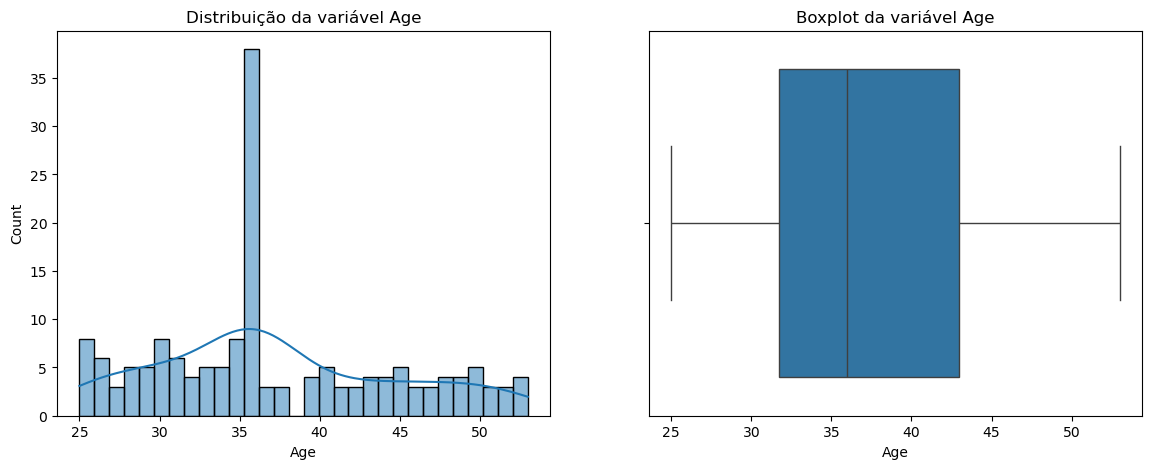

Para a variável 'Age':
 - Q1: 31.75
 - Q3: 43.0
 - IQR: 11.25
 - Limite inferior para outliers: 14.875
 - Limite superior para outliers: 59.875
 - Número de possíveis outliers detectados: 0
 - Percentual de outliers: 0.00%

------------------------------------------------------------



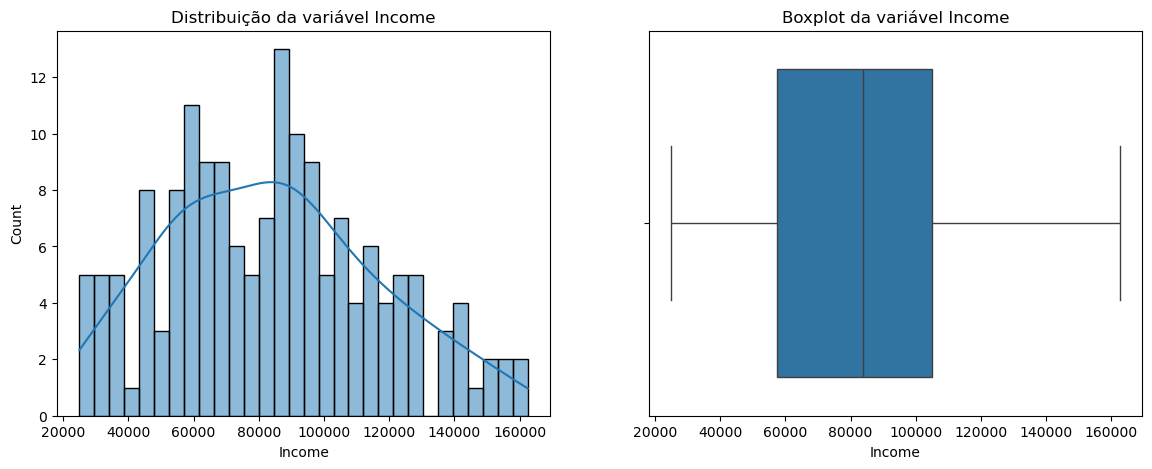

Para a variável 'Income':
 - Q1: 57500.0
 - Q3: 105000.0
 - IQR: 47500.0
 - Limite inferior para outliers: -13750.0
 - Limite superior para outliers: 176250.0
 - Número de possíveis outliers detectados: 0
 - Percentual de outliers: 0.00%

------------------------------------------------------------



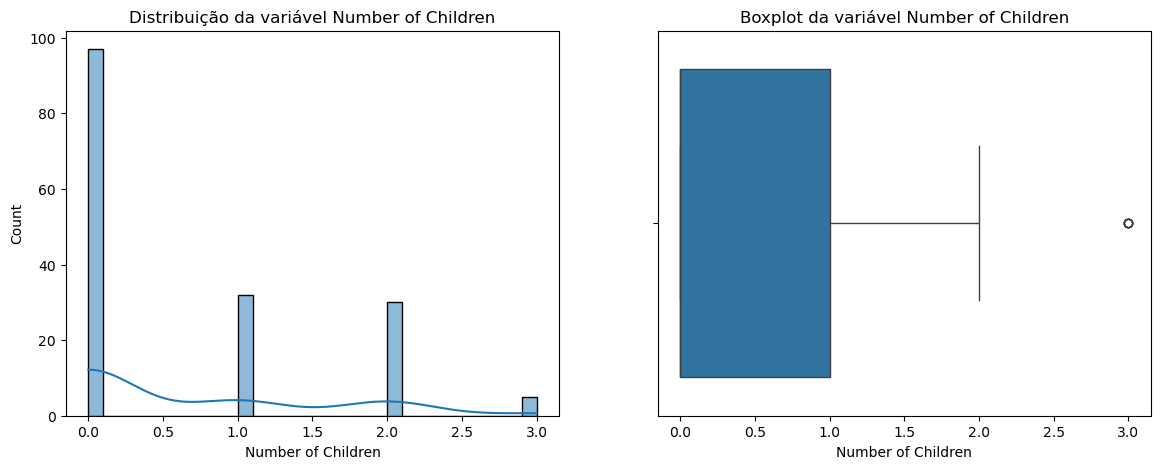

Para a variável 'Number of Children':
 - Q1: 0.0
 - Q3: 1.0
 - IQR: 1.0
 - Limite inferior para outliers: -1.5
 - Limite superior para outliers: 2.5
 - Número de possíveis outliers detectados: 5
 - Percentual de outliers: 3.05%

------------------------------------------------------------



In [6]:
# Estatísticas descritivas das variáveis numéricas
print("\nEstatísticas descritivas das variáveis numéricas:")
print(df_tratado.describe())

# Selecionar as colunas numéricas para análise
colunas_numericas = df_tratado.select_dtypes(include=['float64', 'int64']).columns

# Criar gráficos para cada variável numérica
for coluna in colunas_numericas:
    plt.figure(figsize=(14,5))
    
    # Histograma + KDE para distribuição
    plt.subplot(1,2,1)
    sns.histplot(df_tratado[coluna], kde=True, bins=30)
    plt.title(f'Distribuição da variável {coluna}')
    
    # Boxplot para outliers
    plt.subplot(1,2,2)
    sns.boxplot(x=df_tratado[coluna])
    plt.title(f'Boxplot da variável {coluna}')
    
    plt.show()

    # Insights básicos
    q1 = df_tratado[coluna].quantile(0.25)
    q3 = df_tratado[coluna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    outliers = df_tratado[(df_tratado[coluna] < limite_inferior) | (df_tratado[coluna] > limite_superior)]
    num_outliers = outliers.shape[0]
    
    print(f"Para a variável '{coluna}':")
    print(f" - Q1: {q1}")
    print(f" - Q3: {q3}")
    print(f" - IQR: {iqr}")
    print(f" - Limite inferior para outliers: {limite_inferior}")
    print(f" - Limite superior para outliers: {limite_superior}")
    print(f" - Número de possíveis outliers detectados: {num_outliers}")
    print(f" - Percentual de outliers: {num_outliers / len(df_tratado) * 100:.2f}%")
    print("\n" + "-"*60 + "\n")

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

C:\Users\Léo\AppData\Local\Temp\ipykernel_18684\1934361052.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_tratado, x=col, order=ordem, palette="viridis")


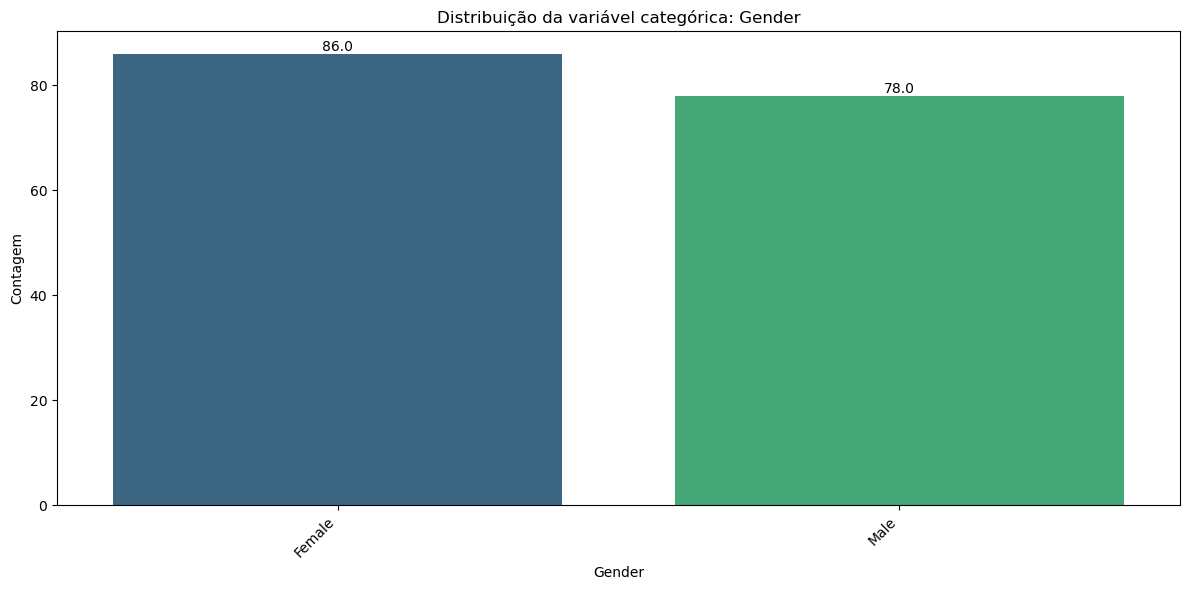

Insights para a variável 'Gender':
  - Categoria 'Female': 86 registros (52.44%)
  - Categoria 'Male': 78 registros (47.56%)

------------------------------------------------------------



C:\Users\Léo\AppData\Local\Temp\ipykernel_18684\1934361052.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_tratado, x=col, order=ordem, palette="viridis")


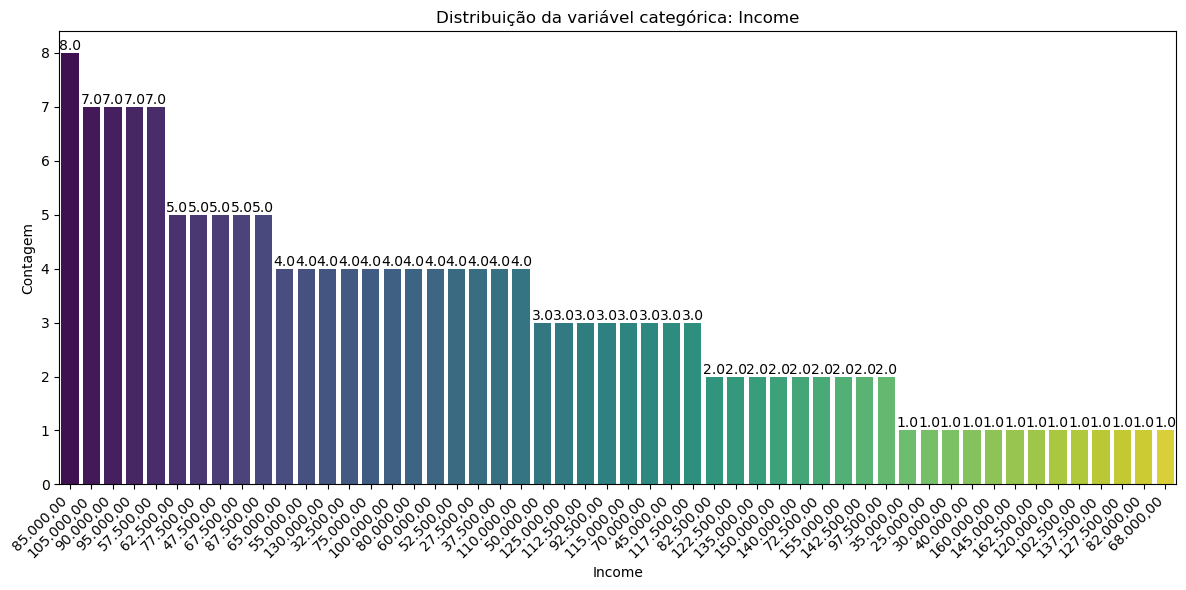

Insights para a variável 'Income':
  - Categoria '85.000,00': 8 registros (4.88%)
  - Categoria '105.000,00': 7 registros (4.27%)
  - Categoria '90.000,00': 7 registros (4.27%)
  - Categoria '95.000,00': 7 registros (4.27%)
  - Categoria '57.500,00': 7 registros (4.27%)
  - Categoria '62.500,00': 5 registros (3.05%)
  - Categoria '77.500,00': 5 registros (3.05%)
  - Categoria '47.500,00': 5 registros (3.05%)
  - Categoria '67.500,00': 5 registros (3.05%)
  - Categoria '87.500,00': 5 registros (3.05%)
  - Categoria '65.000,00': 4 registros (2.44%)
  - Categoria '55.000,00': 4 registros (2.44%)
  - Categoria '130.000,00': 4 registros (2.44%)
  - Categoria '32.500,00': 4 registros (2.44%)
  - Categoria '75.000,00': 4 registros (2.44%)
  - Categoria '100.000,00': 4 registros (2.44%)
  - Categoria '80.000,00': 4 registros (2.44%)
  - Categoria '60.000,00': 4 registros (2.44%)
  - Categoria '52.500,00': 4 registros (2.44%)
  - Categoria '27.500,00': 4 registros (2.44%)
  - Categoria '37.500,

C:\Users\Léo\AppData\Local\Temp\ipykernel_18684\1934361052.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_tratado, x=col, order=ordem, palette="viridis")


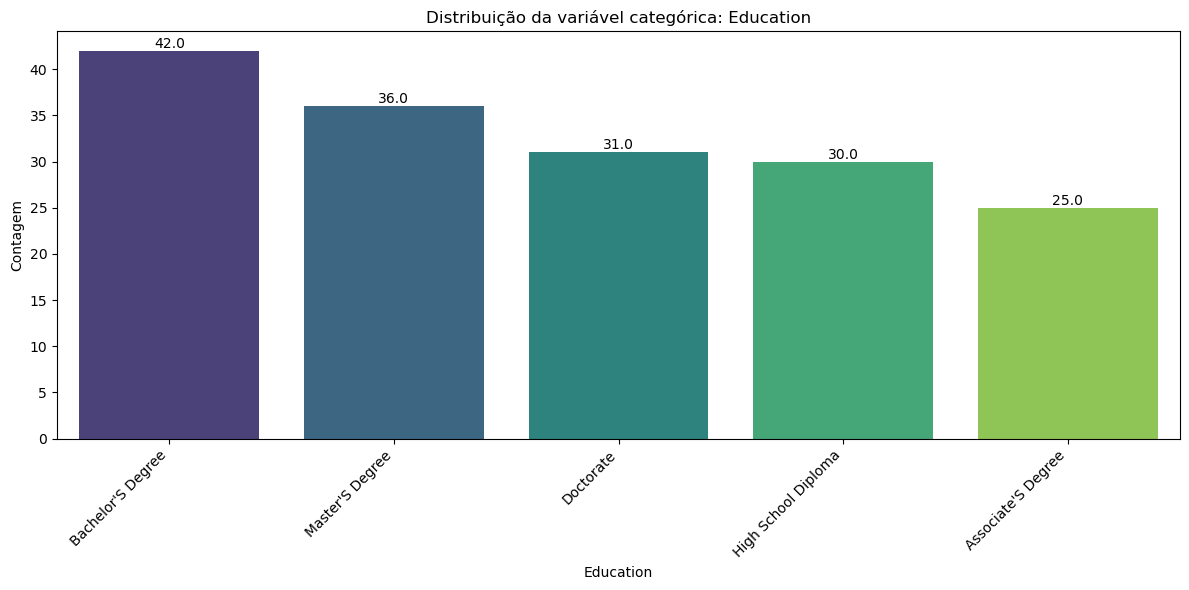

Insights para a variável 'Education':
  - Categoria 'Bachelor'S Degree': 42 registros (25.61%)
  - Categoria 'Master'S Degree': 36 registros (21.95%)
  - Categoria 'Doctorate': 31 registros (18.90%)
  - Categoria 'High School Diploma': 30 registros (18.29%)
  - Categoria 'Associate'S Degree': 25 registros (15.24%)

------------------------------------------------------------



C:\Users\Léo\AppData\Local\Temp\ipykernel_18684\1934361052.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_tratado, x=col, order=ordem, palette="viridis")


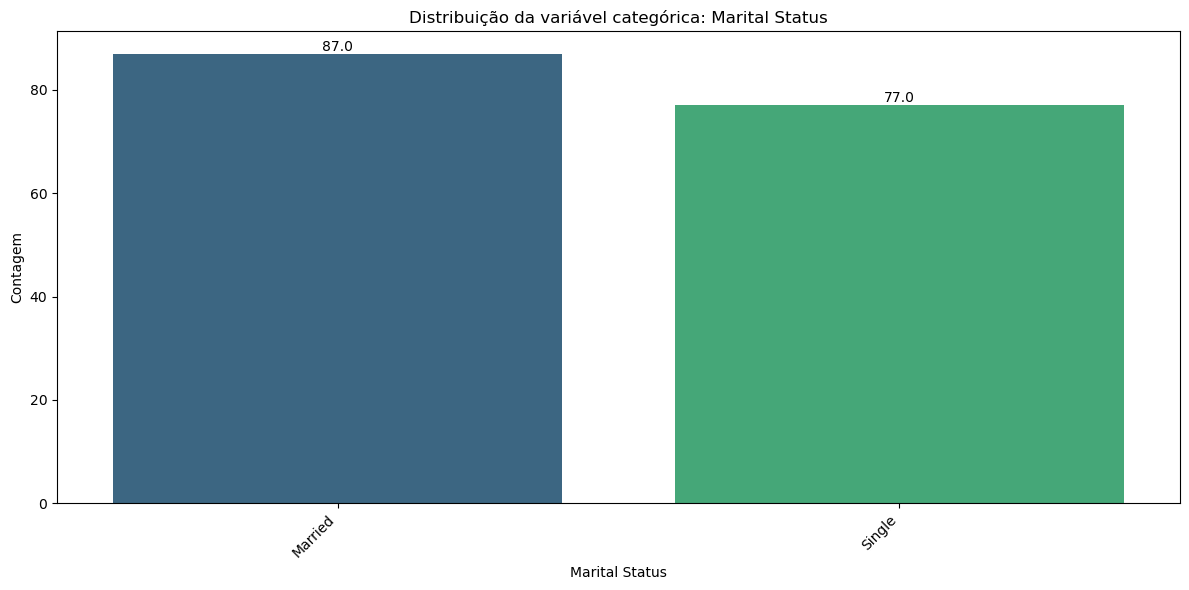

Insights para a variável 'Marital Status':
  - Categoria 'Married': 87 registros (53.05%)
  - Categoria 'Single': 77 registros (46.95%)

------------------------------------------------------------



C:\Users\Léo\AppData\Local\Temp\ipykernel_18684\1934361052.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_tratado, x=col, order=ordem, palette="viridis")


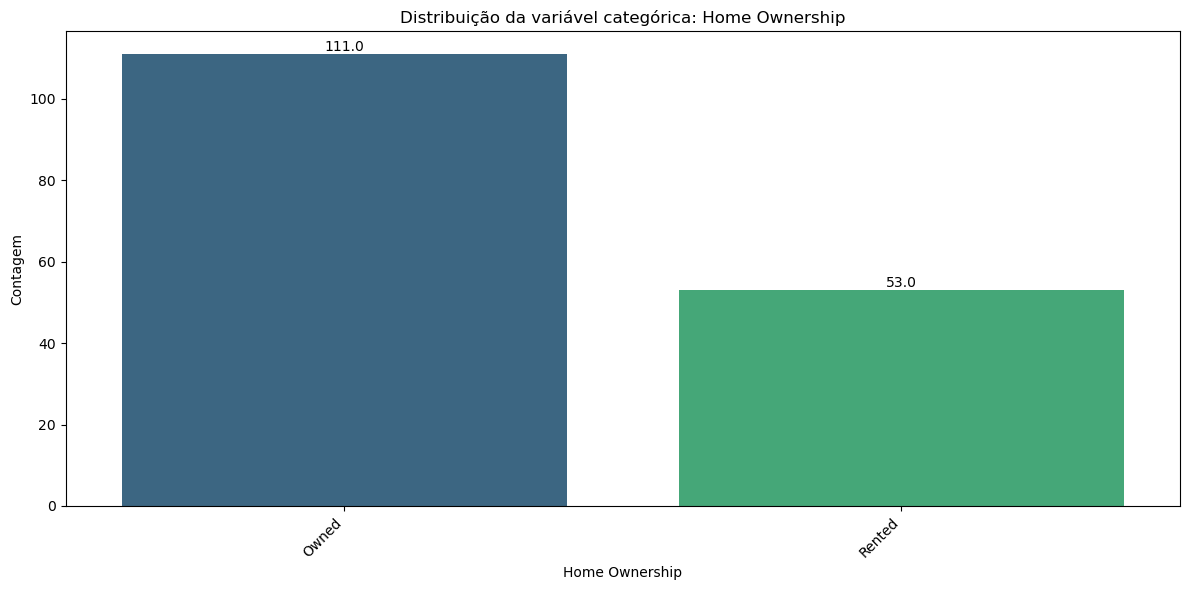

Insights para a variável 'Home Ownership':
  - Categoria 'Owned': 111 registros (67.68%)
  - Categoria 'Rented': 53 registros (32.32%)

------------------------------------------------------------



C:\Users\Léo\AppData\Local\Temp\ipykernel_18684\1934361052.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_tratado, x=col, order=ordem, palette="viridis")


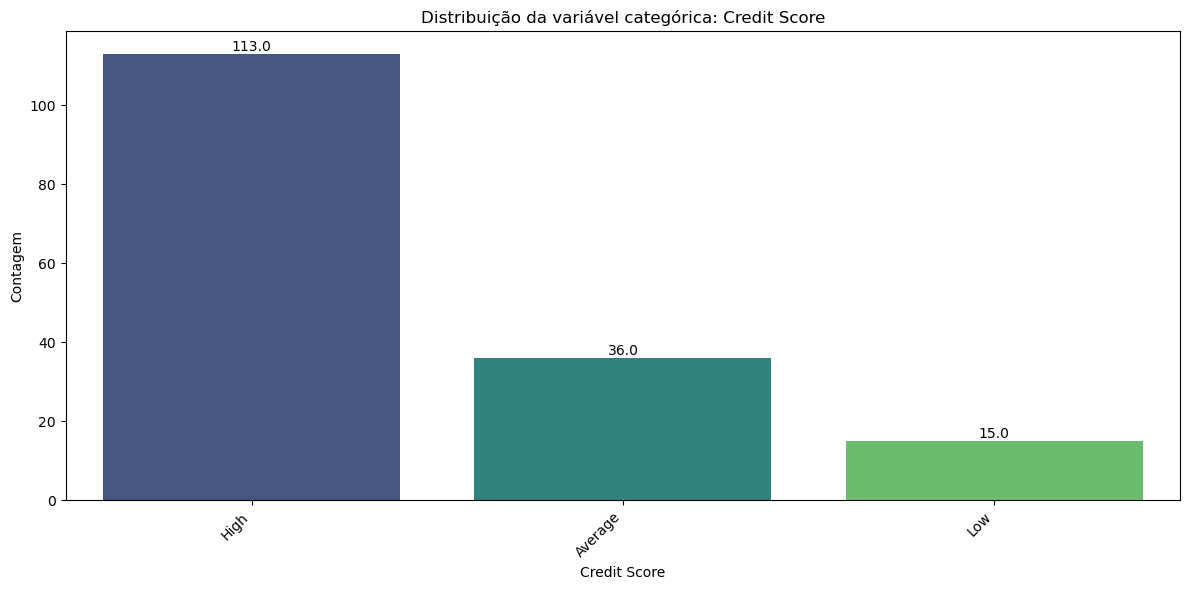

Insights para a variável 'Credit Score':
  - Categoria 'High': 113 registros (68.90%)
  - Categoria 'Average': 36 registros (21.95%)
  - Categoria 'Low': 15 registros (9.15%)

------------------------------------------------------------



In [7]:
df_tratado = df.copy()

mapa_score = {
    'Low': 500,
    'Average': 650,
    'High': 800
}

df_transformado['Credit Score Num'] = df_transformado['Credit Score'].map(mapa_score)

colunas_categoricas = df_tratado.select_dtypes(include='object').columns
df_tratado[colunas_categoricas] = df_tratado[colunas_categoricas].apply(lambda x: x.str.strip())
df_tratado[colunas_categoricas] = df_tratado[colunas_categoricas].apply(lambda x: x.str.title())

for col in colunas_categoricas:
    plt.figure(figsize=(12,6))
    
    ordem = df_tratado[col].value_counts().index
    
    ax = sns.countplot(data=df_tratado, x=col, order=ordem, palette="viridis")
    
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribuição da variável categórica: {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    
    # Adiciona os valores de contagem em cima das barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Insights
    total = len(df_tratado)
    counts = df_tratado[col].value_counts()
    percent = df_tratado[col].value_counts(normalize=True) * 100
    
    print(f"Insights para a variável '{col}':")
    for categoria, qtd in counts.items():
        perc = percent[categoria]
        print(f"  - Categoria '{categoria}': {qtd} registros ({perc:.2f}%)")
    print("\n" + "-"*60 + "\n")


**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Colunas com outliers:
- Number of Children: 5 casos


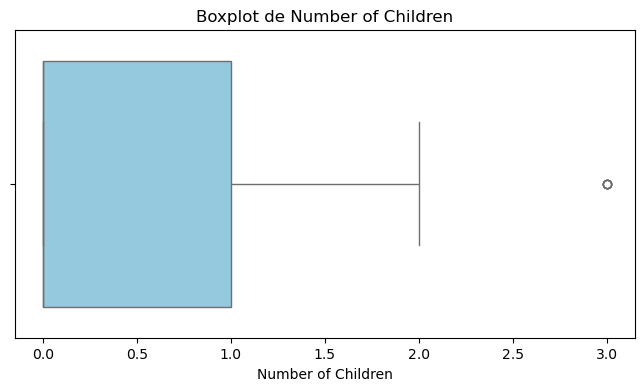


Shape original: (164, 8)
Shape sem outliers: (159, 8)


In [8]:
df.columns = df.columns.str.strip()

def detectar_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return ((data < limite_inferior) | (data > limite_superior))

colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

print("Colunas com outliers:")
for coluna in colunas_numericas:
    outliers = detectar_outliers_iqr(df[coluna])
    if outliers.any():
        print(f"- {coluna}: {outliers.sum()} casos")
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[coluna], color='skyblue')
        plt.title(f'Boxplot de {coluna}')
        plt.show()

df_sem_outliers = df.copy()
for coluna in colunas_numericas:
    outliers = detectar_outliers_iqr(df_sem_outliers[coluna])
    df_sem_outliers = df_sem_outliers[~outliers]

print(f"\nShape original: {df.shape}")
print(f"Shape sem outliers: {df_sem_outliers.shape}")

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



C:\Users\Léo\AppData\Local\Temp\ipykernel_18684\1897654845.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Marital Status', y='Age', palette='Set2')


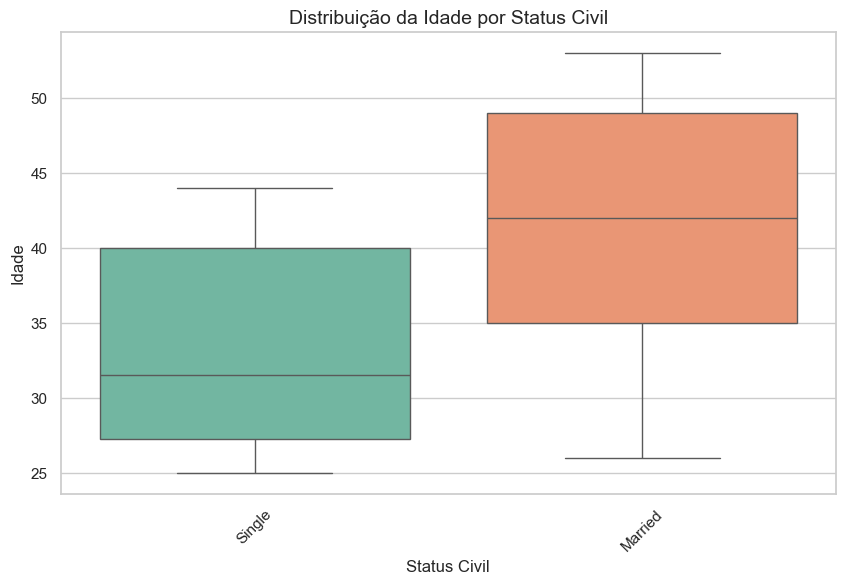

Insight 1: É possível observar a distribuição de idades por status civil. Diferenças grandes podem indicar perfis demográficos distintos entre solteiros, casados, etc.


C:\Users\Léo\AppData\Local\Temp\ipykernel_18684\1897654845.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Education', y='Credit Score Num', palette='Set3')


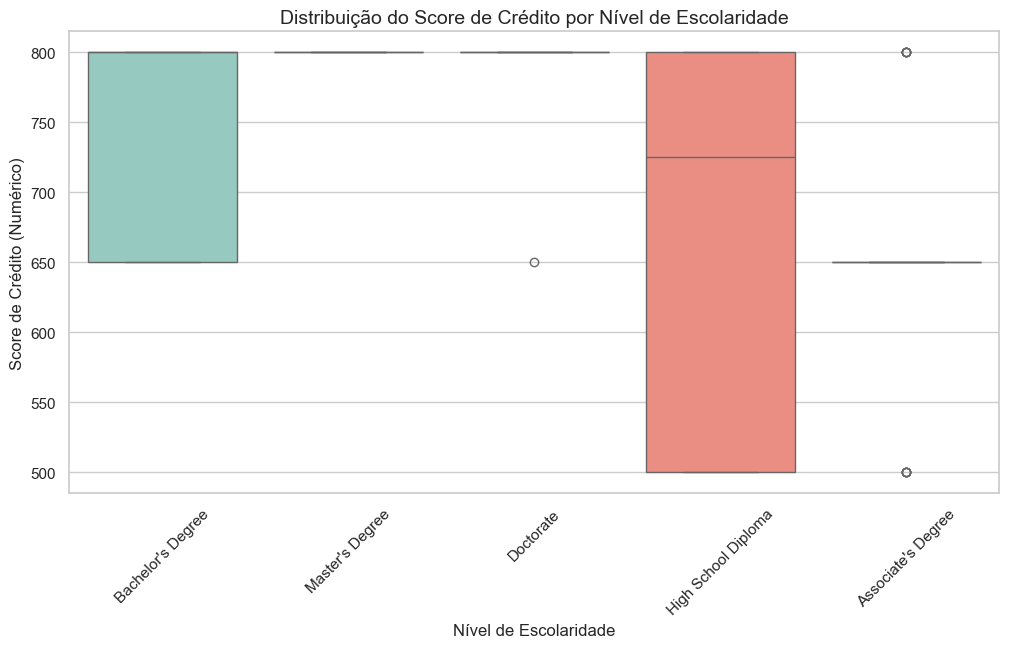

Insight 2: Escolaridade mais alta tende a estar associada a um score de crédito mais elevado.


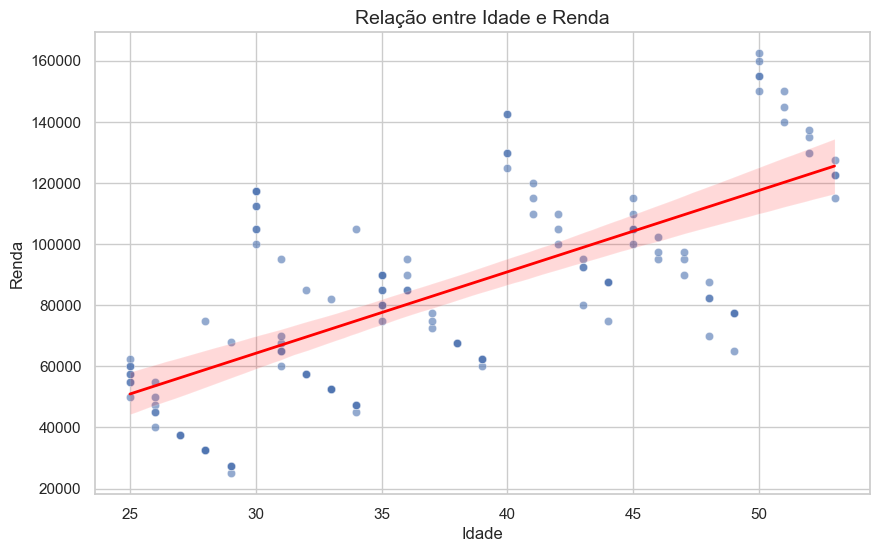

Insight 3: Podemos avaliar se há tendência de aumento ou queda de renda com a idade.


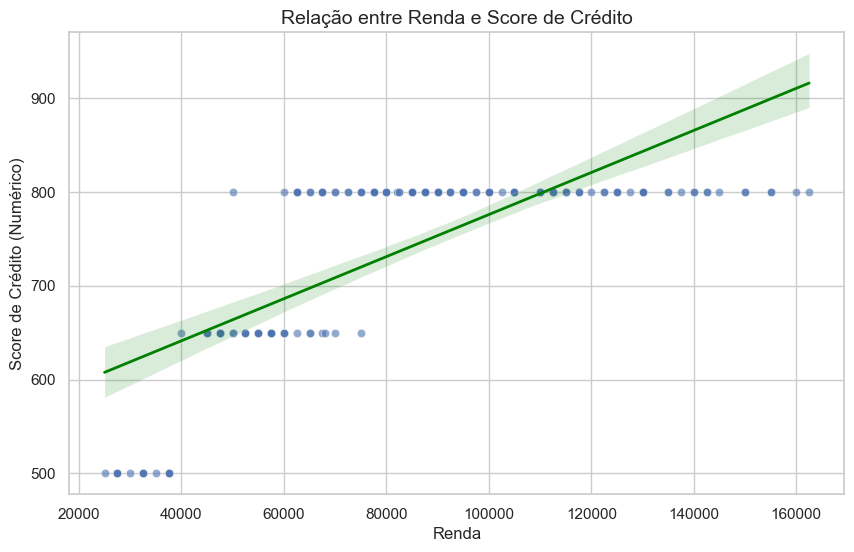

Insight 4: Rendas mais altas podem ter tendência a scores de crédito mais altos, mas também pode haver dispersão significativa.


C:\Users\Léo\AppData\Local\Temp\ipykernel_18684\1897654845.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Home Ownership', y='Credit Score Num', palette='pastel')


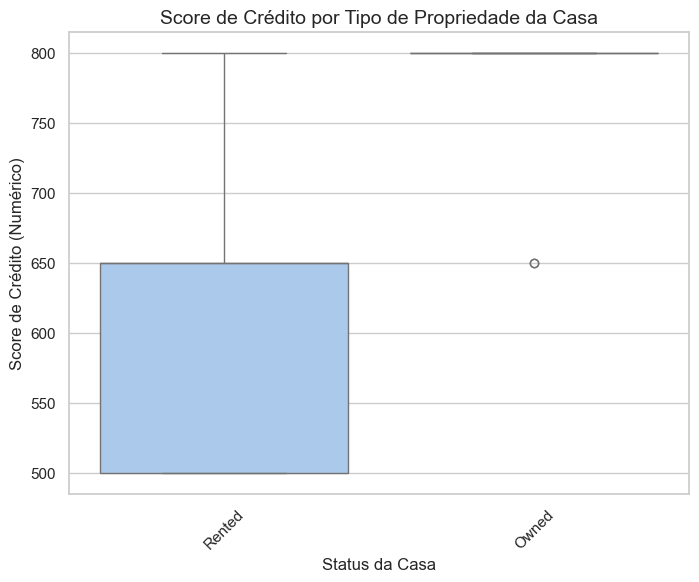

Insight 5: Clientes com casa própria tendem a apresentar score mais alto, indicando possível estabilidade financeira.


In [9]:
sns.set(style="whitegrid")
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

df.columns = df.columns.str.strip()

# --- Tratar coluna Income ---
df['Income'] = df['Income'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# --- Mapear Score de Crédito ---
mapa_score = {
    'Low': 500,
    'Average': 650,
    'High': 800
}
df['Credit Score Num'] = df['Credit Score'].map(mapa_score)

# --- Pergunta 1: Idade x Status Civil ---
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Marital Status', y='Age', palette='Set2')
plt.title('Distribuição da Idade por Status Civil')
plt.xlabel('Status Civil')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.show()

# Insight:
print("Insight 1: É possível observar a distribuição de idades por status civil. Diferenças grandes podem indicar perfis demográficos distintos entre solteiros, casados, etc.")

# --- Pergunta 2: Score de Crédito x Escolaridade ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Education', y='Credit Score Num', palette='Set3')
plt.title('Distribuição do Score de Crédito por Nível de Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Score de Crédito (Numérico)')
plt.xticks(rotation=45)
plt.show()

print("Insight 2: Escolaridade mais alta tende a estar associada a um score de crédito mais elevado.")

# --- Pergunta 3: Salário x Idade ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Income', alpha=0.6)
sns.regplot(data=df, x='Age', y='Income', scatter=False, color='red', line_kws={'linewidth':2})
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()

print("Insight 3: Podemos avaliar se há tendência de aumento ou queda de renda com a idade.")

# --- Pergunta 4: Salário x Score de Crédito ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Income', y='Credit Score Num', alpha=0.6)
sns.regplot(data=df, x='Income', y='Credit Score Num', scatter=False, color='green', line_kws={'linewidth':2})
plt.title('Relação entre Renda e Score de Crédito')
plt.xlabel('Renda')
plt.ylabel('Score de Crédito (Numérico)')
plt.show()

print("Insight 4: Rendas mais altas podem ter tendência a scores de crédito mais altos, mas também pode haver dispersão significativa.")

# --- Pergunta 5: Score de Crédito x Tipo de Propriedade ---
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Home Ownership', y='Credit Score Num', palette='pastel')
plt.title('Score de Crédito por Tipo de Propriedade da Casa')
plt.xlabel('Status da Casa')
plt.ylabel('Score de Crédito (Numérico)')
plt.xticks(rotation=45)
plt.show()

print("Insight 5: Clientes com casa própria tendem a apresentar score mais alto, indicando possível estabilidade financeira.")

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

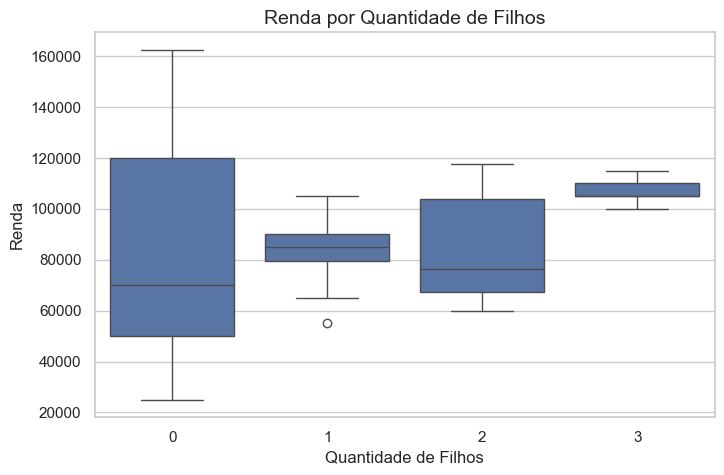

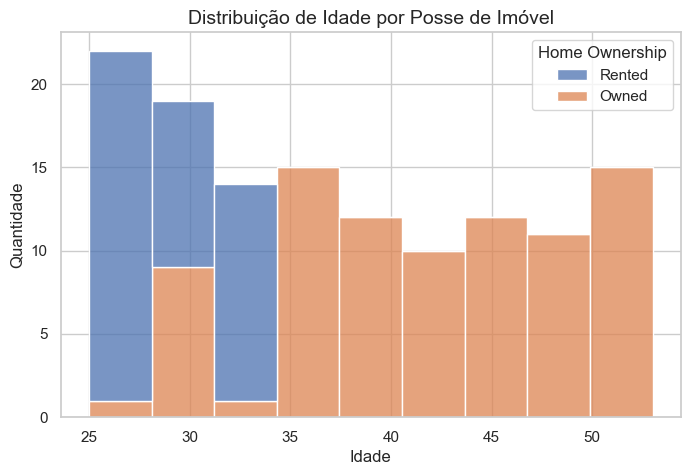

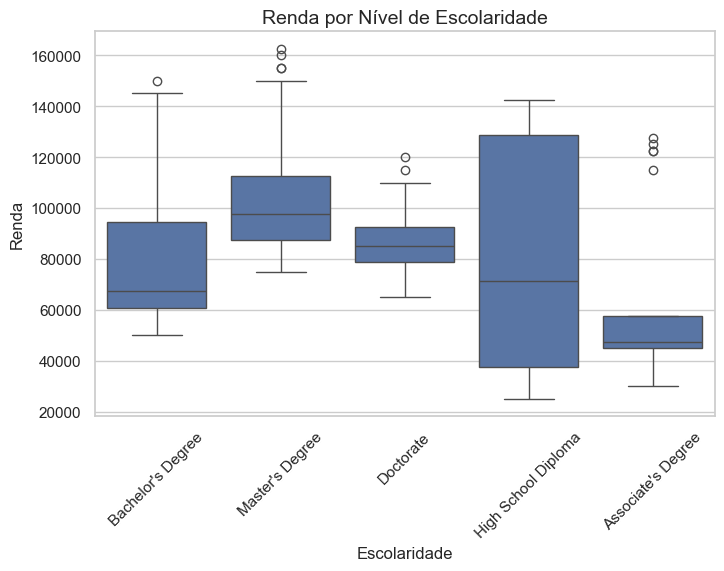

In [10]:
# Pessoas com mais filhos tendem a ter renda maior ou menor?

plt.figure(figsize=(8,5))
sns.boxplot(x='Number of Children', y='Income', data=df)
plt.title('Renda por Quantidade de Filhos')
plt.xlabel('Quantidade de Filhos')
plt.ylabel('Renda')
plt.show()

#Idade influencia na posse de imóvel?

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Home Ownership', multiple='stack', kde=False)
plt.title('Distribuição de Idade por Posse de Imóvel')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

#Escolaridade influencia na renda?

plt.figure(figsize=(8,5))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Renda por Nível de Escolaridade')
plt.xticks(rotation=45)
plt.xlabel('Escolaridade')
plt.ylabel('Renda')
plt.show()

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

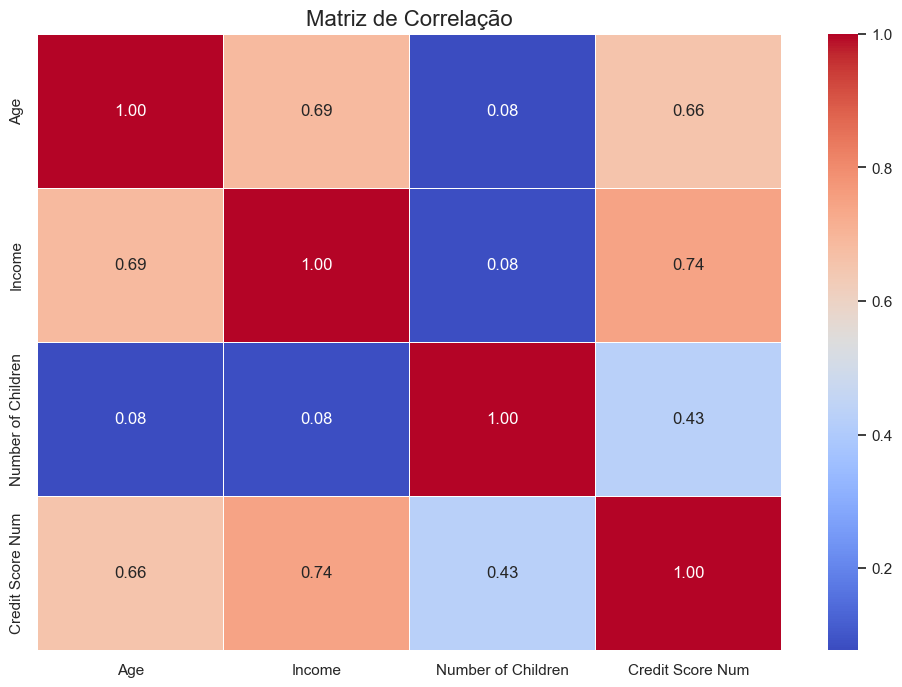

In [11]:
correlation_matrix = df.corr(numeric_only=True)

# Plotar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação", fontsize=16)
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

    Sim, encontrei uma correlação moderada entre Idade e Renda, com coeficiente de aproximadamente 0,685.

    Isso indica que, na sua amostra, quanto maior a idade, maior tende a ser a renda.
    Esse comportamento faz sentido no contexto socioeconômico: pessoas mais velhas geralmente têm mais tempo de experiência profissional, ocupam cargos mais 
    altos ou acumulam mais patrimônio, resultando em salários mais elevados.

     As demais correlações foram muito baixas:

    Idade × Número de Filhos → 0,078 (praticamente nula)

    Renda × Número de Filhos → 0,085 (praticamente nula)

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [12]:
df_encoded = df.copy()

# Detectar colunas categóricas
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

# Aplicar Label Encoding nas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Excluir colunas categóricas originais
df_numeric = df_encoded.drop(columns=categorical_cols, errors='ignore')

# Visualizar
print(df_numeric.head())

    Age    Income  Number of Children  Credit Score Num
0  25.0   50000.0                   0               800
1  30.0  100000.0                   2               800
2  35.0   75000.0                   1               800
3  40.0  125000.0                   0               800
4  45.0  100000.0                   3               800


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

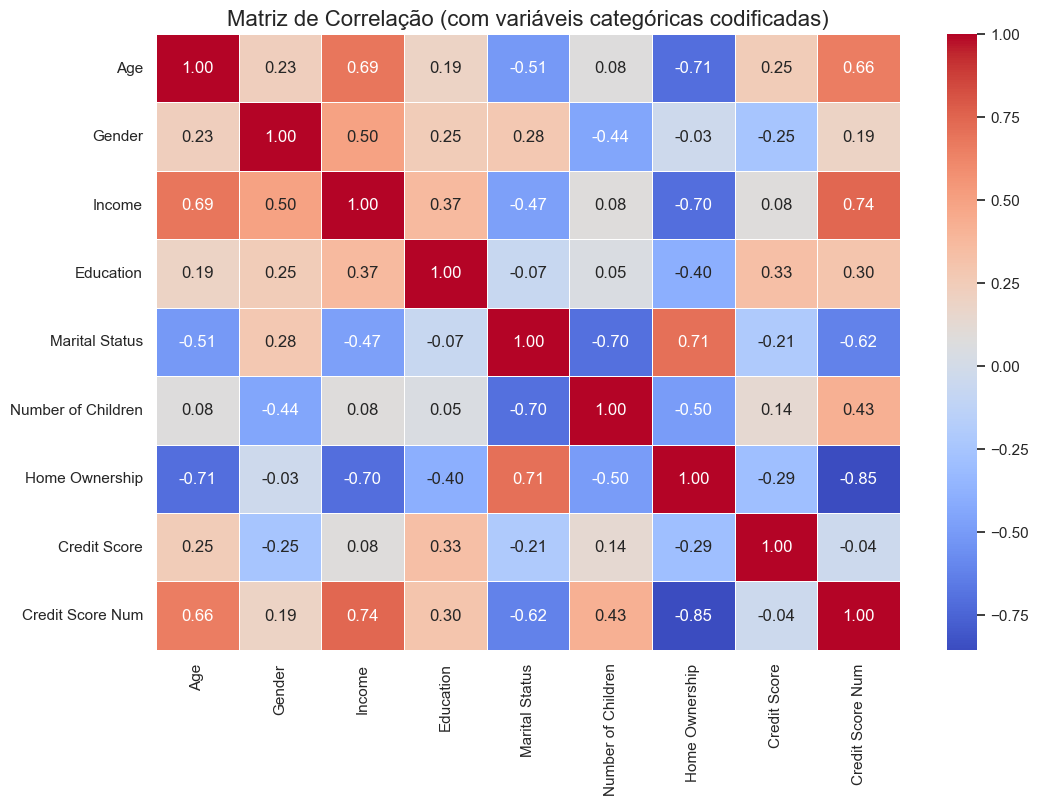

Variáveis com correlação forte (>|0.7|):
Home Ownership × Age → -0.705
Home Ownership × Income → -0.705
Credit Score Num × Income → 0.744
Home Ownership × Marital Status → 0.708
Credit Score Num × Home Ownership → -0.855


In [13]:

df_encoded = df.copy()

# Detectar colunas categóricas
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

# Aplicar Label Encoding nas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Calcular matriz de correlação
correlation_matrix_encoded = df_encoded.corr(numeric_only=True)

# Plotar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação (com variáveis categóricas codificadas)", fontsize=16)
plt.show()

# Identificar pares com correlação alta (> 0.7 ou < -0.7), excluindo autocorrelação
high_corr_pairs = []
threshold = 0.7
for col in correlation_matrix_encoded.columns:
    for idx in correlation_matrix_encoded.index:
        if col != idx and abs(correlation_matrix_encoded.loc[idx, col]) >= threshold:
            high_corr_pairs.append((idx, col, correlation_matrix_encoded.loc[idx, col]))

# Remover duplicados (pares invertidos)
unique_high_corr = []
seen = set()
for a, b, corr in high_corr_pairs:
    if (b, a) not in seen:
        unique_high_corr.append((a, b, corr))
        seen.add((a, b))

# Mostrar pares de forte correlação
print("Variáveis com correlação forte (>|0.7|):")
for a, b, corr in unique_high_corr:
    print(f"{a} × {b} → {corr:.3f}")

    Após incluir as variáveis categóricas codificadas, surgiram novas correlações fortes:

    Home Ownership X Idade → -0,705 (correlação negativa forte)

    Home Ownership × Renda → -0,705 (correlação negativa forte)

    Home Ownership × Estado Civil → 0,708 (correlação positiva forte)

    A relação negativa com Idade e Renda pode indicar que pessoas mais velhas ou com renda maior têm menor valor no código atribuído a “Home Ownership”.
    A correlação positiva com Estado Civil pode indicar que certas categorias de estado civil concentram-se em um mesmo perfil de posse de imóvel.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [14]:
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Verificar shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (114, 8)
X_test shape: (50, 8)
y_train shape: (114,)
y_test shape: (50,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

C:\Users\Léo\AppData\Local\Temp\ipykernel_18684\1039240076.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


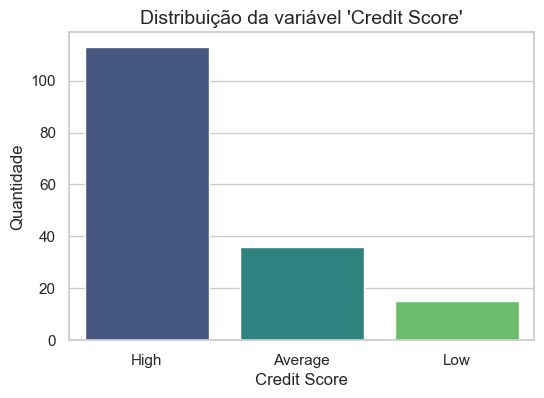

Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


'O gráfico mostra que há um desequilíbrio significativo na coluna Credit Score:\n\nHigh: mais de  100 registros\nAverage: mais de 30 registros\nLow: 15 registros\n\nIsso significa que o modelo de machine learning \npode acabar tendendo a prever mais a classe High, já que ela é majoritária.'

In [15]:
y = df['Credit Score']

score_counts = y.value_counts()

plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="viridis")
plt.title("Distribuição da variável 'Credit Score'")
plt.xlabel("Credit Score")
plt.ylabel("Quantidade")
plt.show()

print(score_counts)

'''O gráfico mostra que há um desequilíbrio significativo na coluna Credit Score:

High: mais de  100 registros
Average: mais de 30 registros
Low: 15 registros

Isso significa que o modelo de machine learning 
pode acabar tendendo a prever mais a classe High, já que ela é majoritária.'''

    O gráfico mostra que há um desequilíbrio significativo na coluna Credit Score:

    High: mais de  100 registros
    Average: mais de 30 registros
    Low: 15 registros

    Isso significa que o modelo de machine learning 
    pode acabar tendendo a prever mais a classe High, já que ela é majoritária. 

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [16]:
df_encoded = df.copy()

# Preencher valores nulos nas variáveis numéricas com a média
for col in df_encoded.select_dtypes(include=['float64', 'int64']).columns:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mean())

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])

label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

X = df_encoded.drop('Credit Score', axis=1)
y = df_encoded['Credit Score']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribuição após balanceamento:")
print(y_resampled.value_counts())

Distribuição após balanceamento:
Credit Score
1    113
0    113
2    113
Name: count, dtype: int64


In [17]:
df.to_csv("CREDIT_SCORE_M20.csv", index=False)

